In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import astropy.table as table
import astropy.units as u
import astropy.constants as const
from astropy.cosmology import Planck15 as cosmology

In [2]:
df = pd.read_hdf('../products/lc_interpolated_per_ins.h5')
df

mag_"g"_ZTF  magerr_"g"_ZTF  mag_"i"_ZTF  magerr_"i"_ZTF  \
mjd                                                                    
58716.3888    18.972152        0.045186    19.230959        0.149647   
58717.3888    18.723950        0.036411    19.072053        0.117624   
58718.3888    18.482736        0.029957    18.891938        0.092034   
58719.3888    18.250384        0.025511    18.694685        0.072902   
58720.3888    18.028632        0.022634    18.484911        0.059742   
...                 ...             ...          ...             ...   
58871.3888    19.718567        0.159474          NaN             NaN   
58872.3888    19.729843        0.171648          NaN             NaN   
58873.3888          NaN             NaN          NaN             NaN   
58874.3888          NaN             NaN          NaN             NaN   
58875.3888          NaN             NaN          NaN             NaN   

            mag_"r"_ZTF  magerr_"r"_ZTF  mag_"g"_SEDM  magerr_"g"_SEDM  \
mjd                                                                      
58716.3888    18.833020        0.033760     18.069113         0.269980   
58717.3888    18.664586        0.024281     17.971336         0.235254   
58718.3888    18.477867        0.019041     17.870803         0.201954   
58719.3888    18.277773        0.017168     17.768423         0.170351   
58720.3888    18.069597        0.017043     17.665177         0.140704   
...                 ...             ...           ...              ...   
58871.3888    19.221826        0.127575           NaN              NaN   
58872.3888    19.231203        0.120985           NaN              NaN   
58873.3888    19.233642        0.113643           NaN              NaN   
58874.3888    19.228725        0.108614           NaN              NaN   
58875.3888    19.216243        0.110168           NaN              NaN   

            mag_"i"_SEDM  magerr_"i"_SEDM  mag_"r"_SEDM  magerr_"r"_SEDM  \
mjd                                                                        
58716.3888     18.568135         0.216188     18.630171         0.000006   
58717.3888     18.414624         0.184655     18.630171         0.000006   
58718.3888     18.259265         0.155399     18.630171         0.000006   
58719.3888     18.103288         0.128519           NaN              NaN   
58720.3888     17.947923         0.104088           NaN              NaN   
...                  ...              ...           ...              ...   
58871.3888           NaN              NaN           NaN              NaN   
58872.3888           NaN              NaN           NaN              NaN   
58873.3888           NaN              NaN           NaN              NaN   
58874.3888           NaN              NaN           NaN              NaN   
58875.3888           NaN              NaN           NaN              NaN   

            mag_"u"_SEDM  magerr_"u"_SEDM  
mjd                                        
58716.3888     17.934097         0.000081  
58717.3888     17.934097         0.000081  
58718.3888     17.934097         0.000081  
58719.3888     17.934097         0.000081  
58720.3888     17.934097         0.000081  
...                  ...              ...  
58871.3888           NaN              NaN  
58872.3888           NaN              NaN  
58873.3888           NaN              NaN  
58874.3888           NaN              NaN  
58875.3888           NaN              NaN  

[160 rows x 14 columns]

In [15]:
df_raw = pd.read_hdf('../products/marshal_raw_lc.h5', '/lc')
df_raw

date         jdobs  \
telescope instrument filter mjd        phot_type                              
P48       ZTF        "i"    58686.4448 IS+PSF     "2019Jul22"  2.458687e+06   
                     "r"    58688.4099 IS+PSF     "2019Jul24"  2.458689e+06   
                     "g"    58688.4670 IS+PSF     "2019Jul24"  2.458689e+06   
                            58690.4911 IS+PSF     "2019Jul26"  2.458691e+06   
                            58690.4916 IS+PSF     "2019Jul26"  2.458691e+06   
...                                                       ...           ...   
                            58873.1102 IS+PSF     "2020Jan25"  2.458874e+06   
                     "r"    58876.0960 IS+PSF     "2020Jan28"  2.458877e+06   
                            58876.1010 IS+PSF     "2020Jan28"  2.458877e+06   
                            58876.1059 IS+PSF     "2020Jan28"  2.458877e+06   
                            58876.1109 IS+PSF     "2020Jan28"  2.458877e+06   

                                                  mag_abs    mag  magerr  \
telescope instrument filter mjd        phot_type                           
P48       ZTF        "i"    58686.4448 IS+PSF         NaN    NaN   99.00   
                     "r"    58688.4099 IS+PSF         NaN    NaN   99.00   
                     "g"    58688.4670 IS+PSF         NaN    NaN   99.00   
                            58690.4911 IS+PSF         NaN    NaN   99.00   
                            58690.4916 IS+PSF         NaN    NaN   99.00   
...                                                   ...    ...     ...   
                            58873.1102 IS+PSF      -14.17  19.75    0.19   
                     "r"    58876.0960 IS+PSF         NaN    NaN   99.00   
                            58876.1010 IS+PSF      -14.70  19.21    0.17   
                            58876.1059 IS+PSF         NaN    NaN   99.00   
                            58876.1109 IS+PSF      -14.74  19.18    0.21   

                                                  mag_limiting  
telescope instrument filter mjd        phot_type                
P48       ZTF        "i"    58686.4448 IS+PSF            19.24  
                     "r"    58688.4099 IS+PSF            20.32  
                     "g"    58688.4670 IS+PSF            19.64  
                            58690.4911 IS+PSF            20.16  
                            58690.4916 IS+PSF            20.15  
...                                                        ...  
                            58873.1102 IS+PSF            19.96  
                     "r"    58876.0960 IS+PSF            18.29  
                            58876.1010 IS+PSF            19.39  
                            58876.1059 IS+PSF            17.63  
                            58876.1109 IS+PSF            19.25  

[264 rows x 6 columns]

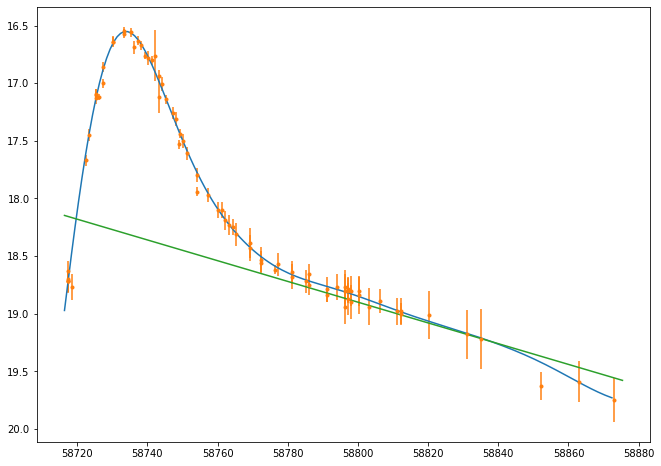

In [25]:
plt.figure(figsize=(11,8))

plt.plot(df.index, df['mag_"g"_ZTF'])

df_raw_g = df_raw.query('filter == \'"g"\'')
#print(df_raw_g)
plt.errorbar(df_raw_g.index.get_level_values('mjd'), df_raw_g['mag'], marker='.', ls='', yerr=df_raw_g['magerr'])

plt.gca().invert_yaxis()
plt.plot(df.index, 18.9+(df.index-58800)*0.009)

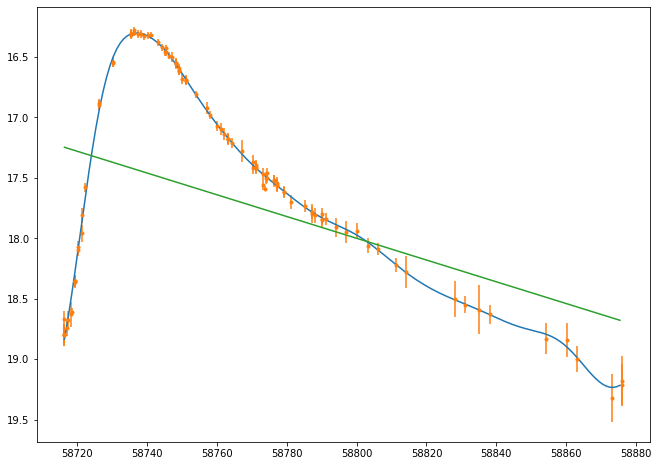

In [27]:
plt.figure(figsize=(11,8))

plt.plot(df.index, df['mag_"r"_ZTF'])

df_raw_g = df_raw.query('filter == \'"r"\'')
#print(df_raw_g)
plt.errorbar(df_raw_g.index.get_level_values('mjd'), df_raw_g['mag'], marker='.', ls='', yerr=df_raw_g['magerr'])

plt.gca().invert_yaxis()
plt.plot(df.index, 18.0+(df.index-58800)*0.009)

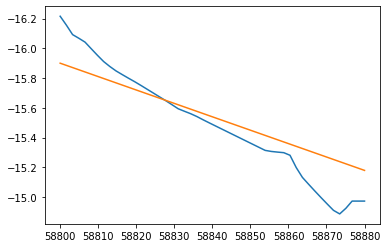

In [39]:
# should be bolometric mag.. but even Lyman slowly runs out of steam here..
# or at least the "proper" way.. with some linear interpolation maybe
MJD_START = 58800
MJD_STOP = 58880

MJD_GRID = np.linspace(MJD_START, MJD_STOP)

# interpolate the lightcurves
def interpolate(band, mjd_grid):
    df = df_raw.query('filter == \'"%s"\'' % band).dropna()
    mjd_obs = df.index.get_level_values('mjd')
    mag_obs = df['mag']
    mag_interp = np.interp(mjd_grid, mjd_obs, mag_obs)
    return mag_interp



# we use pBC from lyman(2014)
# pBC_g = \sum_i c_i (g-r)**i
lyman_gr_pbc_params = np.array([
    0.168, -0.407, -0.608, # c0 c1 c2
    0.074 # rms
])

lyman_gr_bc_params = np.array([
    0.054, -0.195, -0.719, # c0 c1 c2
    0.076 # rms
])

EXTINCTION_COEFF = {
    'g': 3.303,
    'r': 2.285,
    'i': 1.698,
    'z': 1.263,
    'J': 0.723,
    'H': 0.460,
    'K': 0.310
}
ebv = 0.165

g = interpolate('g', MJD_GRID) - EXTINCTION_COEFF['g'] * ebv
r = interpolate('r', MJD_GRID) - EXTINCTION_COEFF['r'] * ebv

c0, c1, c2, rms = lyman_gr_bc_params

dmag = g-r
pbc = c0 + c1*dmag + c2*dmag ** 2

mag_bol_x = g + pbc

def load_distance(fname):
    params = table.Table.read(fname, format='ascii')
    z = params['redshift'][0]
    z_err = params['err_redshift'][0]
    #z_sample = np.random.normal(z, z_err, size=SAMPLE_NUM)
    dist = cosmology.luminosity_distance(z).to(u.pc).value
    #dist_sample = cosmology.luminosity_distance(z_sample).to(u.pc).value
    return dist#, dist_sample

dist = load_distance('../const/distance/current')
dist_mod = 5*np.log10(dist) - 5
#dist_mod_sample = 5*np.log10(dist_sample) - 5
abs_mag = mag_bol_x - dist_mod

plt.plot(MJD_GRID, abs_mag)
plt.plot(MJD_GRID, -15.9+(MJD_GRID-58800)*0.009)
plt.gca().invert_yaxis()